In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plot

In [2]:
df0 = pd.read_csv('./Sales_Data/Order Details.csv')
df1 = pd.read_csv('./Sales_Data/List of Orders.csv')
all_data = pd.merge(df0,df1, how='left', on='Order ID') # Merged to add month column in Order Details

all_data = all_data.drop(['CustomerName'], axis=1)

all_data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Maharashtra,Pune


#### Add Month Column

In [3]:
all_data['Month'] = all_data['Order Date'].str[3:5]

all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,State,City,Month
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Gujarat,Ahmedabad,4
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Gujarat,Ahmedabad,4
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Gujarat,Ahmedabad,4
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Gujarat,Ahmedabad,4
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Maharashtra,Pune,4


#### Ques1: What was the best month for sales? How much was earned that month?

#### Add Sales column

In [4]:
all_data['Sales'] = all_data['Amount'] * all_data['Quantity']

all_data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,State,City,Month,Sales
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Gujarat,Ahmedabad,4,8925.0
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Gujarat,Ahmedabad,4,330.0
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Gujarat,Ahmedabad,4,24.0
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Gujarat,Ahmedabad,4,320.0
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Maharashtra,Pune,4,336.0


In [5]:
results = all_data.groupby('Month').sum()
results

,Amount,Profit,Quantity,Sales
Month,,,,
1,61439.0,9760.0,745,337229.0
2,38424.0,5917.0,512,177620.0
3,58937.0,10077.0,751,321750.0
4,32726.0,-3960.0,389,152827.0
5,28545.0,-3584.0,423,138767.0
6,23658.0,-4970.0,369,110015.0
7,12966.0,-2138.0,240,53144.0
8,30899.0,-2180.0,446,151514.0
9,26628.0,-4963.0,331,132717.0


#### Ploting graph for the above analysis

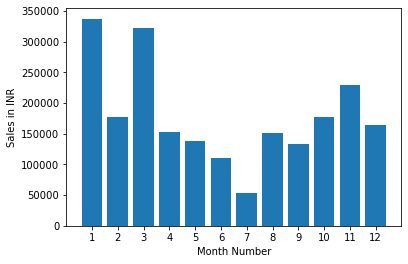

In [6]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in INR")
plt.xlabel("Month Number")
plt.show()

## Conclusion:
#### January has the highest sales

### Ques 2: Which city has the highest number of sales?

In [7]:
results = all_data.groupby('City').sum()

results

,Amount,Profit,Quantity,Month,Sales
City,,,,,
Ahmedabad,14230.0,-880.0,235,339,69346.0
Allahabad,16857.0,3081.0,138,254,120812.0
Amritsar,4507.0,544.0,52,156,17245.0
Bangalore,15058.0,645.0,180,284,66231.0
Bhopal,23583.0,871.0,247,374,104730.0
Chandigarh,21142.0,172.0,275,373,115237.0
Chennai,6087.0,-2216.0,91,109,29195.0
Delhi,25019.0,3508.0,306,346,106037.0
Gangtok,5276.0,401.0,93,119,20045.0


### Ploting graph for for analysis

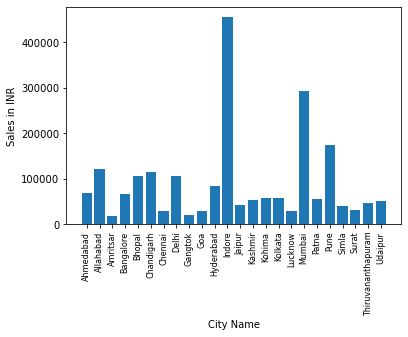

In [8]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in INR')
plt.xlabel('City Name')
plt.show()

## Conclusion: 
#### Indore has the highest sales

### Ques 3: which Top 5 States has highest Profit & which 5 States has worst Profit?

In [9]:
outcome = all_data.groupby('State').sum()
outcome

,Amount,Profit,Quantity,Month,Sales
State,,,,,
Andhra Pradesh,13256.0,-496.0,146,258,82897.0
Bihar,12943.0,-321.0,206,297,54082.0
Delhi,22531.0,2987.0,277,262,97071.0
Goa,6705.0,370.0,145,258,27919.0
Gujarat,21058.0,465.0,328,564,100292.0
Haryana,8863.0,1325.0,111,131,54891.0
Himachal Pradesh,8666.0,656.0,113,184,39850.0
Jammu and Kashmir,10829.0,8.0,177,212,53201.0
Karnataka,15058.0,645.0,180,284,66231.0


## Ploting graph for above analysis

### Graph for Top 5 States Profit

<AxesSubplot:xlabel='State'>

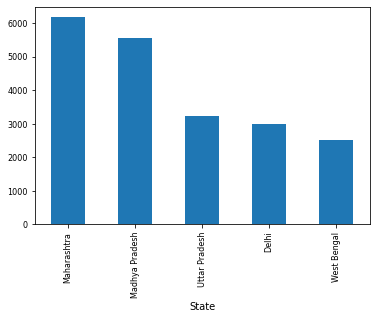

In [10]:
outcome_sorted = outcome.sort_values(by=['Profit'], ascending=False)
Top_5_State = outcome_sorted['Profit'].head()
Top_5_State.plot(kind="bar", fontsize=8)


### Graph for worst profit of 5 state 

<AxesSubplot:xlabel='State'>

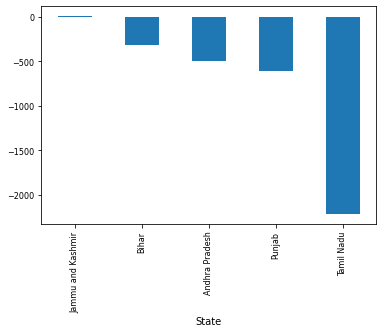

In [11]:
Worst_5_State = outcome_sorted['Profit'].tail()
Worst_5_State.plot(kind="bar", fontsize=8)

### Ques 4: What products are most often sold together?

In [12]:
sold_2 = all_data[all_data['Order ID'].duplicated(keep=False)]
sold_2.head(20)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,State,City,Month,Sales
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Gujarat,Ahmedabad,4,8925.0
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Gujarat,Ahmedabad,4,330.0
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Gujarat,Ahmedabad,4,24.0
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Gujarat,Ahmedabad,4,320.0
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Maharashtra,Pune,4,336.0
5,B-25602,424.0,-272.0,5,Electronics,Phones,01-04-2018,Maharashtra,Pune,4,2120.0
6,B-25602,2617.0,1151.0,4,Electronics,Phones,01-04-2018,Maharashtra,Pune,4,10468.0
7,B-25602,561.0,212.0,3,Clothing,Saree,01-04-2018,Maharashtra,Pune,4,1683.0
8,B-25602,119.0,-5.0,8,Clothing,Saree,01-04-2018,Maharashtra,Pune,4,952.0
9,B-25603,1355.0,-60.0,5,Clothing,Trousers,03-04-2018,Madhya Pradesh,Bhopal,4,6775.0


In [13]:
sold_2['Grouped'] = sold_2.groupby('Order ID')['Sub-Category'].transform(lambda x: ','.join(x))
sold_2.head()

<ipython-input-13-e52ab84ad1f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_2['Grouped'] = sold_2.groupby('Order ID')['Sub-Category'].transform(lambda x: ','.join(x))


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,State,City,Month,Sales,Grouped
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Gujarat,Ahmedabad,4,8925.0,"Bookcases,Stole,Hankerchief,Electronic Games"
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Gujarat,Ahmedabad,4,330.0,"Bookcases,Stole,Hankerchief,Electronic Games"
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Gujarat,Ahmedabad,4,24.0,"Bookcases,Stole,Hankerchief,Electronic Games"
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Gujarat,Ahmedabad,4,320.0,"Bookcases,Stole,Hankerchief,Electronic Games"
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Maharashtra,Pune,4,336.0,"Phones,Phones,Phones,Saree,Saree"


In [14]:
sold_2 = sold_2[['Order ID','Grouped']].drop_duplicates()
sold_2.head(20)

,Order ID,Grouped
0,B-25601,"Bookcases,Stole,Hankerchief,Electronic Games"
4,B-25602,"Phones,Phones,Phones,Saree,Saree"
9,B-25603,"Trousers,Chairs,Saree,Trousers,Stole,Stole,Han..."
17,B-25604,"T-shirt,Saree"
22,B-25608,"Tables,Chairs,Hankerchief,Printers"
26,B-25609,"Electronic Games,Saree"
28,B-25610,"Printers,Stole,Accessories,Printers,Saree,Furn..."
37,B-25614,"Bookcases,Electronic Games"
40,B-25616,"Hankerchief,Stole,Hankerchief,Hankerchief"
45,B-25618,"Bookcases,Hankerchief"


In [15]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in sold_2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(15):
    print(key,value)

('Hankerchief', 'Hankerchief') 82
('Stole', 'Hankerchief') 80
('Saree', 'Saree') 69
('Hankerchief', 'Saree') 69
('Stole', 'Saree') 60
('Saree', 'Stole') 49
('Saree', 'Hankerchief') 41
('Stole', 'Stole') 41
('Hankerchief', 'Stole') 41
('Saree', 'Electronic Games') 31
('Hankerchief', 'Electronic Games') 30
('Hankerchief', 'Printers') 29
('Skirt', 'Saree') 29
('Saree', 'Phones') 29
('Hankerchief', 'Skirt') 28


### Ques 5: What product sold the most & why do think it sold the most?

In [16]:
all_data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,State,City,Month,Sales
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Gujarat,Ahmedabad,4,8925.0
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Gujarat,Ahmedabad,4,330.0
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Gujarat,Ahmedabad,4,24.0
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Gujarat,Ahmedabad,4,320.0
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Maharashtra,Pune,4,336.0


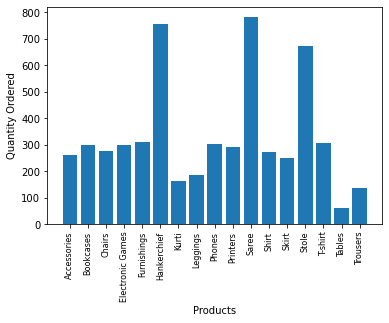

In [17]:
product_sold = all_data.groupby('Sub-Category')
quantity_ordered = product_sold.sum()['Quantity']

products = [product for product, df in product_sold]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

<ipython-input-19-66a4ed1a7293>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, 'Accessories'),
 Text(1, 0, 'Bookcases'),
 Text(2, 0, 'Chairs'),
 Text(3, 0, 'Electronic Games'),
 Text(4, 0, 'Furnishings'),
 Text(5, 0, 'Hankerchief'),
 Text(6, 0, 'Kurti'),
 Text(7, 0, 'Leggings'),
 Text(8, 0, 'Phones'),
 Text(9, 0, 'Printers'),
 Text(10, 0, 'Saree'),
 Text(11, 0, 'Shirt'),
 Text(12, 0, 'Skirt'),
 Text(13, 0, 'Stole'),
 Text(14, 0, 'T-shirt'),
 Text(15, 0, 'Tables'),
 Text(16, 0, 'Trousers')]

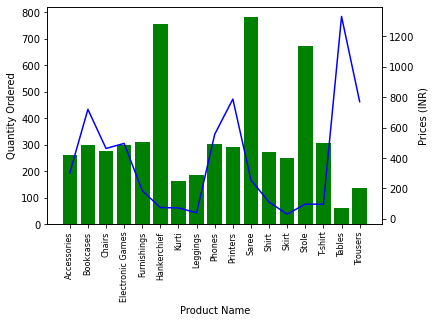

In [19]:
prices = all_data.groupby('Sub-Category').mean()['Amount']


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Prices (INR)')
ax1.set_xticklabels(products, rotation='vertical', size=8)

## Conclusion:
#### The products that has low prices, has more quantity sold